# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhdad Alfaris Bachmid
- **Email:** m309b4ky3140@bangkit.academy
- **ID Dicoding:** alfarisbachmid

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara waktu pengiriman dan kepuasan pelanggan berdasarkan skor ulasan?
- Apa kategori produk yang paling banyak dibeli dan bagaimana kinerja penjual berdasarkan lokasi?

## Import Semua Packages/Library yang Digunakan

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [121]:
orders = pd.read_csv('orders_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')
geolocation = pd.read_csv('geolocation_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
order_reviews = pd.read_csv('order_reviews_dataset.csv')
product_categories = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('sellers_dataset.csv')
products = pd.read_csv('products_dataset.csv')

Memuat sembilan dataset yang merupakan bagian dari Proyek Analisis Data.

### Assessing Data

**Orders Dataset**

In [122]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Dataset ini berisi 99.441 baris, yang berarti ada 99.441 pesanan yang direkam dalam dataset.

In [123]:
print(orders.describe())

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

Cek nilai null

In [124]:
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


**Customers Dataset**

In [125]:
print(customers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [126]:
print(customers.describe())


       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


In [127]:
print(customers.isnull().sum())


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


**Geolocation Dataset**

In [128]:
print(geolocation.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [129]:
print(geolocation.describe())


       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02


In [130]:
print(geolocation.isnull().sum())


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


**Order Items Dataset**

In [131]:
print(order_items.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [132]:
print(order_items.describe())


       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000


In [133]:
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


**Order Payments Dataset**

In [134]:
print(order_payments.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [135]:
print(order_payments.describe())


       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [136]:
print(order_payments.isnull().sum())


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


**Order Reviews Dataset**

In [137]:
print(order_reviews.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [138]:
print(order_reviews.describe())


       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [139]:
print(order_reviews.isnull().sum())


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


**Product Categories Dataset**

In [140]:
print(product_categories.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [141]:
print(product_categories.describe())


       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [142]:
print(product_categories.isnull().sum())


product_category_name            0
product_category_name_english    0
dtype: int64


**Sellers Dataset**

In [143]:
print(sellers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [144]:
print(sellers.describe())


       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


In [145]:
print(sellers.isnull().sum())


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


**Products Dataset**

In [146]:
print(products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [147]:
print(products.describe())


       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.0

In [148]:
print(products.isnull().sum())


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


**Insight:**
- xxx
- xxx

### Cleaning Data

Konversi kolom terkait waktu menjadi tipe datetime

In [149]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')


Menghapus duplikasi memastikan data pelanggan bersih dan unik

In [150]:
customers.drop_duplicates(inplace=True)


In [151]:
geolocation.drop_duplicates(inplace=True)


In [152]:
order_items.drop_duplicates(inplace=True)


In [153]:
order_payments.drop_duplicates(inplace=True)


In [154]:
order_reviews.drop_duplicates(inplace=True)


In [155]:
product_categories.drop_duplicates(inplace=True)


In [156]:
sellers.drop_duplicates(inplace=True)


In [157]:
products.drop_duplicates(inplace=True)


**Insight:**
- Pembersihan data dengan menghapus duplikasi mencegah analisis bias.
- Konversi tanggal memungkinkan untuk melakukan analisis waktu seperti menghitung jeda waktu pengiriman, perbandingan estimasi, dan performa logistik.

## Exploratory Data Analysis (EDA)

### Explore ...

In [158]:
merged_data = orders.merge(customers, on='customer_id') \
                     .merge(order_items, on='order_id') \
                     .merge(order_reviews, on='order_id') \
                     .merge(products, on='product_id')


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


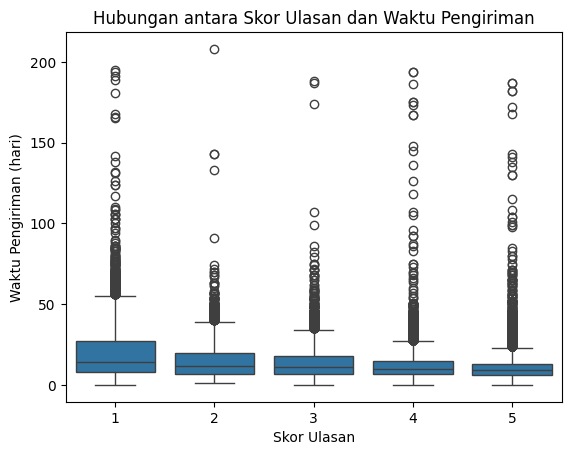

In [159]:
merged_data['delivery_time'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days
sns.boxplot(x='review_score', y='delivery_time', data=merged_data)
plt.title('Hubungan antara Skor Ulasan dan Waktu Pengiriman')
plt.xlabel('Skor Ulasan')
plt.ylabel('Waktu Pengiriman (hari)')
plt.show()

**Insight**
- Waktu pengiriman yang lebih lama tampaknya berkorelasi dengan ulasan yang lebih buruk (skor 1 dan 2).
- Waktu pengiriman yang lebih cepat umumnya menghasilkan ulasan yang lebih baik (skor 5).

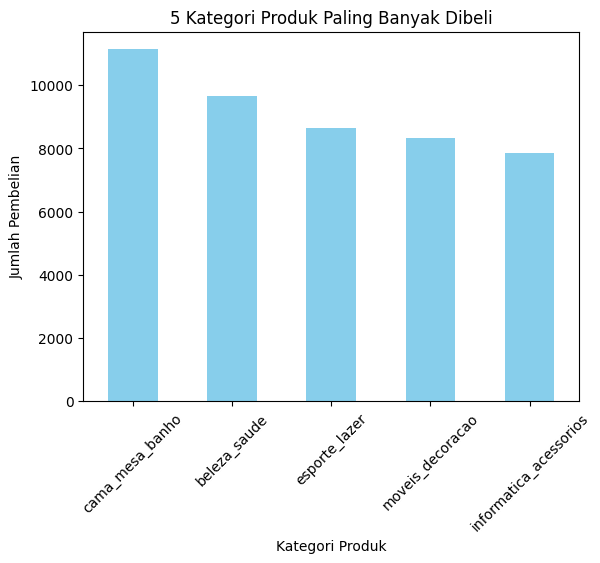

In [160]:
top_categories = merged_data['product_category_name'].value_counts().head(5)
top_categories.plot(kind='bar', color='skyblue')
plt.title('5 Kategori Produk Paling Banyak Dibeli')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()

**Insight**
- Kategori produk tempat tidur, meja, dan mandi (cama_mesa_banho) adalah kategori yang paling sering dibeli, menunjukkan kebutuhan rumah tangga yang dominan di kalangan konsumen.
- Produk kecantikan dan kesehatan juga sangat populer, yang mungkin menunjukkan fokus pada perawatan diri dan kesehatan.
- Ada permintaan signifikan untuk produk di berbagai kategori, menunjukkan bahwa platform atau toko ini melayani pasar yang beragam dengan berbagai kebutuhan dan preferensi produk.

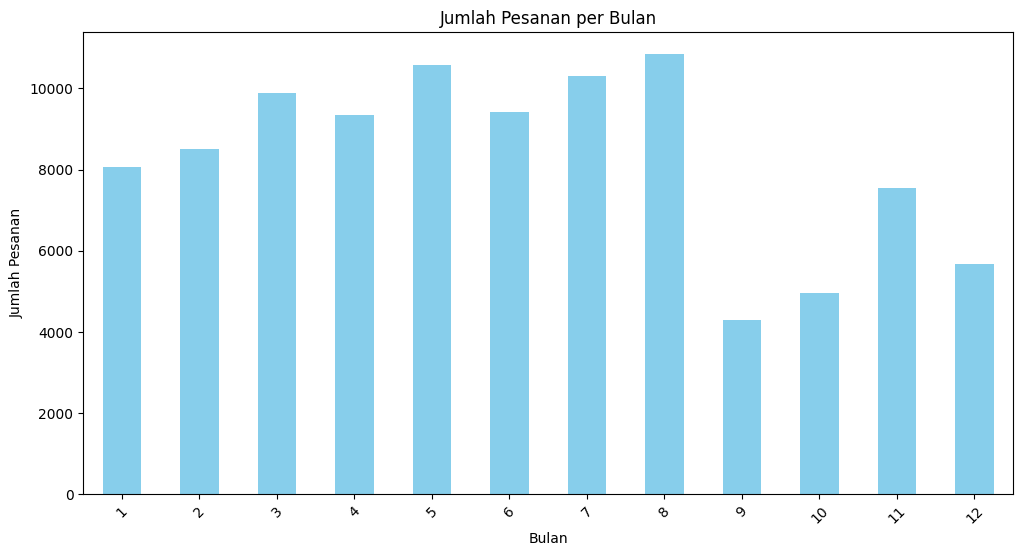

In [161]:
orders['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

**Insight yang Dapat Ditarik**
1. Fluktuasi Pesanan Bulanan
- Terdapat bulan-bulan tertentu di mana jumlah pesanan mencapai puncaknya, sementara di bulan-bulan lainnya jumlah pesanan cenderung lebih rendah. Ini mengindikasikan adanya pola musiman atau faktor-faktor lain yang mempengaruhi tingkat penjualan.

2. Bulan dengan Penjualan Tertinggi
- Dengan melihat batang tertinggi pada grafik, kita dapat mengidentifikasi bulan dengan jumlah pesanan terbanyak. Bulan ini biasanya dianggap sebagai periode puncak penjualan.

3. Bulan dengan Penjualan Terendah
- Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi penyebab penurunan penjualan pada bulan-bulan tersebut, seperti kurangnya promosi atau persaingan yang ketat.


<ipython-input-162-6827786dd376>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_payments, x='payment_type', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

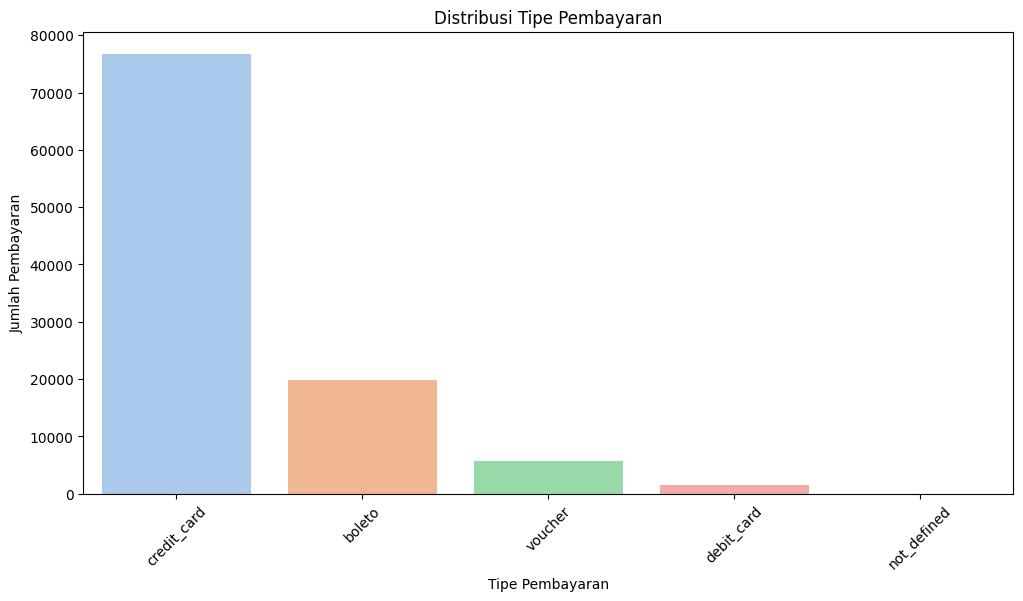

In [162]:
plt.figure(figsize=(12, 6))
sns.countplot(data=order_payments, x='payment_type', palette='pastel')
plt.title('Distribusi Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Pembayaran')
plt.xticks(rotation=45)
plt.show()

**Insight yang Dapat Ditarik**
1. Kartu Kredit Dominan: Metode pembayaran dengan jumlah transaksi tertinggi adalah kartu kredit. Ini menunjukkan bahwa sebagian besar pelanggan merasa nyaman dan lebih memilih menggunakan kartu kredit untuk pembayaran.
2. Pembayaran yang Tidak Terdefinisi: Kategori "not_defined" menunjukkan adanya transaksi dengan tipe pembayaran yang tidak tercatat atau tidak valid. Ini bisa menjadi area yang perlu diselidiki lebih lanjut untuk memastikan akurasi data.


<ipython-input-163-edfb0d2ec0ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_reviews, x='review_score', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

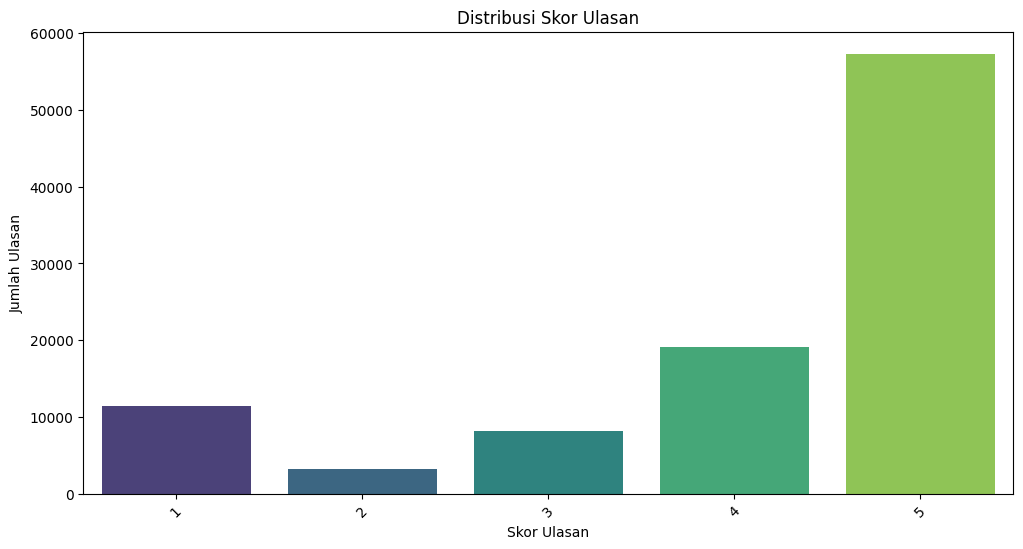

In [163]:
plt.figure(figsize=(12, 6))
sns.countplot(data=order_reviews, x='review_score', palette='viridis')
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.show()

**Insight yang Dapat Ditarik**
1. Tren Sentimen Pelanggan: Pola keseluruhan dari distribusi bar dapat menunjukkan tren sentimen pelanggan. Distribusi yang condong ke kanan (dengan bar lebih panjang di skor tinggi) menunjukkan kepuasan pelanggan yang tinggi.

In [164]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'], errors='coerce')
order_reviews['review_creation_month'] = order_reviews['review_creation_date'].dt.to_period('M')


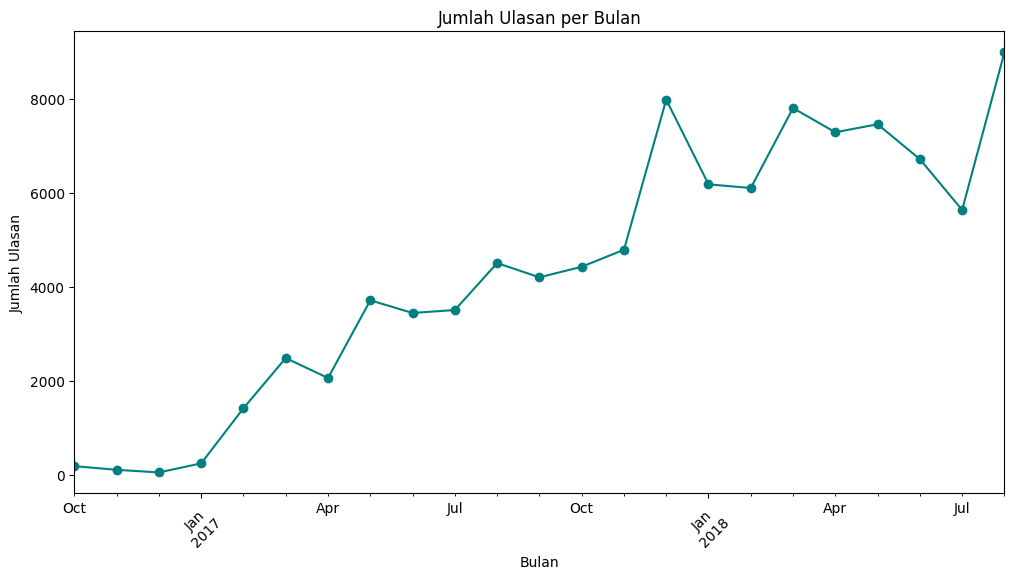

In [165]:
review_counts = order_reviews['review_creation_month'].value_counts().sort_index()
review_counts.plot(kind='line', figsize=(12, 6), marker='o', color='teal')
plt.title('Jumlah Ulasan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.show()


**Insight yang Dapat Ditarik**
1. Tren Ulasan Bulanan:
Terdapat bulan-bulan tertentu di mana jumlah ulasan melonjak, sementara di bulan lainnya jumlah ulasan cenderung lebih sedikit. Fluktuasi ini mungkin disebabkan oleh beberapa faktor, seperti peluncuran produk baru, periode promosi besar, atau bisa juga dipengaruhi oleh faktor eksternal seperti musim liburan.
2. Periode Puncak Ulasan:
Titik tertinggi pada garis menunjukkan bulan dengan jumlah ulasan terbanyak. Periode ini kemungkinan besar merupakan waktu dengan aktivitas pelanggan yang tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara waktu pengiriman dan kepuasan pelanggan berdasarkan skor ulasan?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


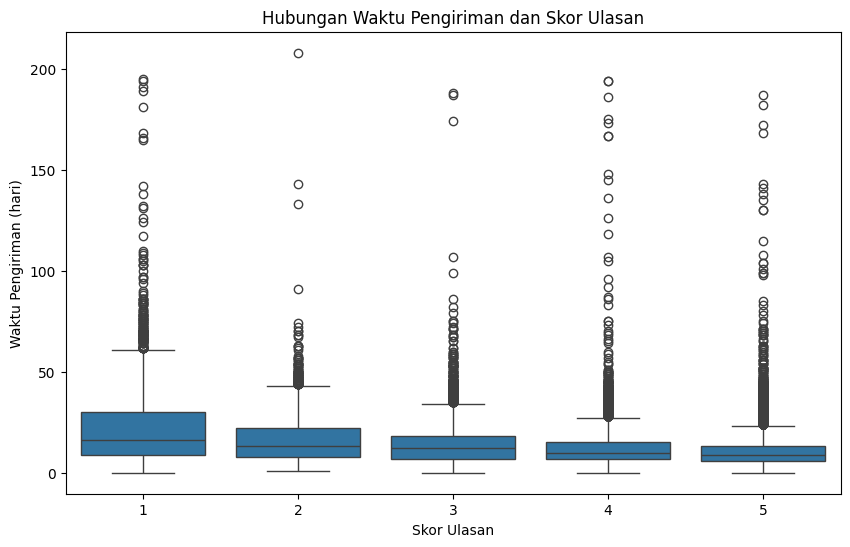

In [166]:
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

order_review_merged = pd.merge(orders[['order_id', 'delivery_time']], order_reviews[['order_id', 'review_score']], on='order_id', how='inner')

plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='delivery_time', data=order_review_merged)
plt.title('Hubungan Waktu Pengiriman dan Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Waktu Pengiriman (hari)')
plt.show()


**Detail Analisis**
1. Secara keseluruhan, waktu pengiriman untuk semua ulasan berkisar antara sekitar 0 hingga 50 hari, dengan beberapa outliers yang menunjukkan waktu pengiriman di atas 100 hari hingga mendekati 200 hari.
2. Hubungan antara Skor Ulasan dan Waktu Pengiriman:
- Skor Ulasan 1:
Distribusi waktu pengiriman untuk skor ini cenderung lebih lebar, dengan beberapa outliers yang sangat tinggi (lebih dari 100 hari). Ini menunjukkan bahwa banyak ulasan buruk mungkin disebabkan oleh waktu pengiriman yang sangat lama.
- Skor Ulasan 2 hingga 4:
Waktu pengiriman untuk ulasan dengan skor 2 hingga 4 relatif lebih konsisten dan sedikit lebih cepat dibandingkan skor 1. Namun, masih ada outliers yang signifikan.
- Skor Ulasan 5:
Pada ulasan dengan skor tertinggi, waktu pengiriman tampak lebih cepat dibandingkan ulasan lainnya. Namun, ada juga beberapa outliers yang menunjukkan pengiriman lama (lebih dari 50 hari).

### Pertanyaan 2: Apa kategori produk yang paling banyak dibeli dan bagaimana kinerja penjual berdasarkan lokasi?

In [167]:
product_seller_merged = pd.merge(order_items[['order_id', 'product_id', 'seller_id']],
                                 products[['product_id', 'product_category_name']],
                                 on='product_id', how='left')
product_seller_merged = pd.merge(product_seller_merged, sellers[['seller_id', 'seller_city', 'seller_state']],
                                 on='seller_id', how='left')

top_product_categories = product_seller_merged['product_category_name'].value_counts().head(10)


<ipython-input-168-cb79a68fe0e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_categories.values, y=top_product_categories.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWar

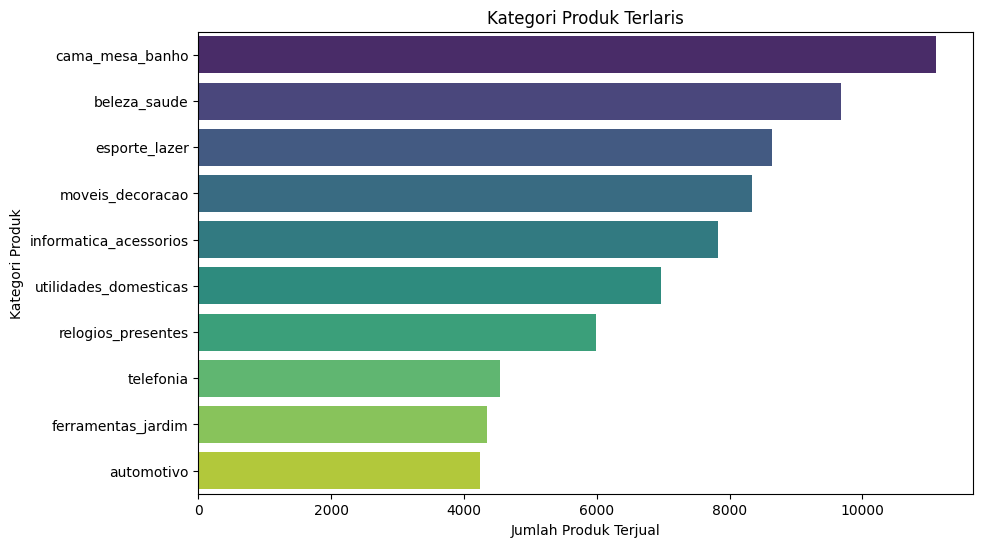

In [168]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_product_categories.values, y=top_product_categories.index, palette='viridis')
plt.title('Kategori Produk Terlaris')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Kategori Produk')
plt.show()


In [169]:
top_seller_cities = product_seller_merged['seller_city'].value_counts().head(10)

<ipython-input-170-d6de54a7e417>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_seller_cities.values, y=top_seller_cities.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

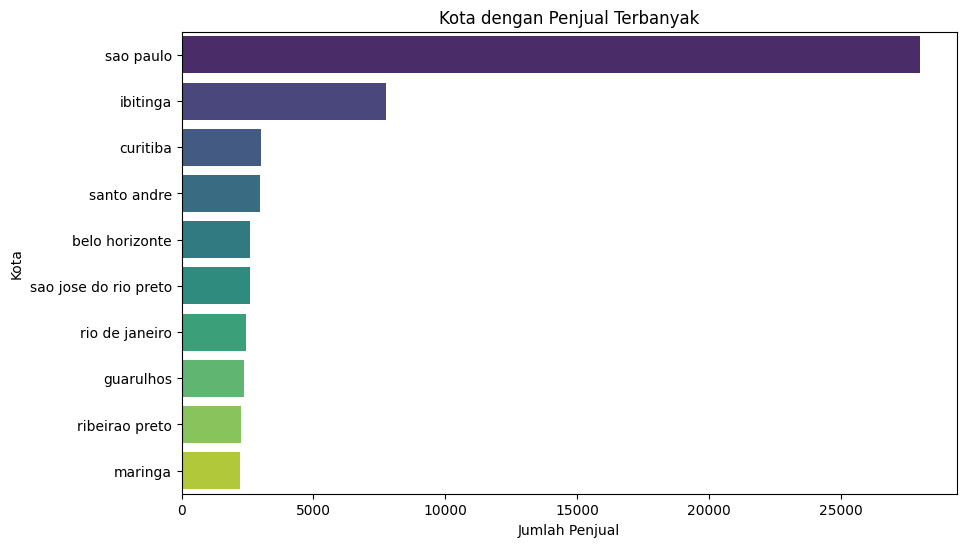

In [170]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_seller_cities.values, y=top_seller_cities.index, palette='viridis')
plt.title('Kota dengan Penjual Terbanyak')
plt.xlabel('Jumlah Penjual')
plt.ylabel('Kota')
plt.show()


**Detail Analisis**
- Kategori Dominan: Kategori "cama_mesa_banho" (kasur, meja, kamar mandi) mendominasi penjualan. Ini mengindikasikan bahwa produk-produk rumah tangga sangat diminati oleh konsumen.
- Konsentrasi Penjual di Kota Besar: Sebagian besar penjual terkonsentrasi di kota-kota besar. Ini mengindikasikan bahwa kota-kota ini memiliki pasar yang lebih besar, infrastruktur yang lebih baik, dan aksesibilitas yang lebih mudah bagi bisnis.


## Analisis Lanjutan

### RFM Analysis (Recency, Frequency, Monetary)

**Data untuk RFM Analysis**

In [171]:
order_data = pd.merge(orders[['order_id', 'customer_id', 'order_purchase_timestamp']],
                      order_items[['order_id', 'price']],
                      on='order_id', how='inner')

rfm_data = pd.merge(order_data, customers[['customer_id']], on='customer_id', how='inner')

rfm_data['order_purchase_timestamp'] = pd.to_datetime(rfm_data['order_purchase_timestamp'])

rfm_data['Monetary'] = rfm_data.groupby('customer_id')['price'].transform('sum')

reference_date = rfm_data['order_purchase_timestamp'].max()
rfm_data['Recency'] = (reference_date - rfm_data.groupby('customer_id')['order_purchase_timestamp'].transform('max')).dt.days

rfm_data['Frequency'] = rfm_data.groupby('customer_id')['order_id'].transform('count')

rfm_scores = rfm_data[['customer_id', 'Recency', 'Frequency', 'Monetary']].drop_duplicates()



In [172]:
print(rfm_scores.head())

                        customer_id  Recency  Frequency  Monetary
0  9ef432eb6251297304e76186b10a928d      335          1     29.99
1  b0830fb4747a6c6d20dea0b8c802d7ef       40          1    118.70
2  41ce2a54c0b03bf3443c3d931a367089       26          1    159.90
3  f88197465ea7920adcdbec7375364d82      288          1     45.00
4  8ab97904e6daea8866dbdbc4fb7aad2c      201          1     19.90


**Kategori RFM dari Kuantil**

In [173]:
def rfm_category(column, ascending=True):
    return pd.qcut(column.rank(method='first', ascending=ascending), 4, labels=[4, 3, 2, 1])

rfm_scores['Recency_Score'] = rfm_category(rfm_scores['Recency'], ascending=False)

rfm_scores['Frequency_Score'] = rfm_category(rfm_scores['Frequency'])

rfm_scores['Monetary_Score'] = rfm_category(rfm_scores['Monetary'])

rfm_scores['RFM_Score'] = rfm_scores['Recency_Score'].astype(str) + rfm_scores['Frequency_Score'].astype(str) + rfm_scores['Monetary_Score'].astype(str)



In [174]:
print(rfm_scores[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())

                        customer_id  Recency  Frequency  Monetary RFM_Score
0  9ef432eb6251297304e76186b10a928d      335          1     29.99       344
1  b0830fb4747a6c6d20dea0b8c802d7ef       40          1    118.70       142
2  41ce2a54c0b03bf3443c3d931a367089       26          1    159.90       141
3  f88197465ea7920adcdbec7375364d82      288          1     45.00       344
4  8ab97904e6daea8866dbdbc4fb7aad2c      201          1     19.90       244


**Insight dari Analisis RFM**
- Stategi perusahaan untuk mengembangkan strategi pemasaran yang lebih tertarget. Misalnya, pelanggan dengan skor rendah di recency tetapi tinggi di monetary mungkin perlu dipikirkan strategi untuk menarik mereka kembali.
- Perbaikan layanan dengan melihat pelanggan dengan skor RFM rendah dapat membantu bisnis mengidentifikasi area untuk perbaikan dalam pelayanan, waktu pengiriman, atau pengalaman pelanggan secara keseluruhan.
- Identifikasi pelanggan setia deengan mengetahui frekuensi pembelian dan total pengeluaran, bisnis dapat memberikan penghargaan atau insentif kepada pelanggan setia untuk meningkatkan retensi.



## Conclusion

### Pertanyaan 1

Bagaimana hubungan antara waktu pengiriman dan kepuasan pelanggan berdasarkan skor ulasan?

**Insight yang Diperoleh:**


1. Skor Ulasan Tinggi Tidak Berarti Waktu Pengiriman Lebih Singkat:
- Pada skor ulasan 4 dan 5, median waktu pengiriman cenderung berada pada kisaran 10 hari, yang mirip dengan skor ulasan yang lebih rendah seperti 1 dan 2. Ini menunjukkan bahwa waktu pengiriman yang lebih cepat tidak selalu berkorelasi dengan ulasan yang lebih baik.
- Bahkan pada ulasan skor 5, terdapat outliers yang menunjukkan waktu pengiriman yang mencapai lebih dari 100 hari, meskipun ini adalah pengecualian.


2. Variabilitas Waktu Pengiriman Tertinggi di Skor Ulasan 1:
- Ulasan dengan skor 1 memiliki waktu pengiriman yang sangat bervariasi, termasuk banyak outliers yang mencapai lebih dari 50 hingga 200 hari. Hal ini menunjukkan bahwa beberapa pelanggan yang memberikan ulasan buruk mungkin mengalami waktu pengiriman yang sangat lama.

3. Outliers Terdapat di Semua Skor Ulasan:
- Outliers dapat ditemukan di semua kategori ulasan, baik itu untuk ulasan dengan skor rendah (1 dan 2) maupun skor tinggi (4 dan 5). Ini mengindikasikan bahwa meskipun pelanggan menerima barang dalam waktu yang lama, beberapa dari mereka tetap memberikan ulasan yang baik.

4. Pengaruh Waktu Pengiriman pada Kepuasan Pelanggan:
- Berdasarkan distribusi waktu pengiriman, dapat disimpulkan bahwa meskipun waktu pengiriman yang lebih lama dapat menyebabkan ulasan negatif (seperti terlihat pada skor ulasan 1 dan 2), beberapa pelanggan tetap memberikan ulasan positif walaupun pengiriman membutuhkan waktu yang lama.
- Namun demikian, waktu pengiriman yang ekstrem (outliers) yang sangat lama lebih sering diasosiasikan dengan ulasan buruk (skor 1 dan 2).


**Kesimpulan**
- Waktu pengiriman yang lama, terutama yang melampaui 50 hari, dapat menjadi faktor penurunan kepuasan pelanggan, terlihat dari ulasan dengan skor rendah.
- Tidak ada korelasi langsung antara waktu pengiriman dan skor ulasan yang konsisten, karena beberapa pelanggan tetap memberikan ulasan tinggi meskipun pengiriman memakan waktu lebih lama.
- Penting bagi bisnis untuk menjaga waktu pengiriman dalam rentang yang wajar untuk mencegah ulasan negatif, terutama karena skor ulasan 1 menunjukkan variabilitas waktu pengiriman yang paling signifikan.

### Pertanyaan 2

Apa kategori produk yang paling banyak dibeli dan bagaimana kinerja penjual berdasarkan lokasi?

**Insight yang Diperoleh:**


1. Insight dari Visualisasi Pertama (Kategori Produk Terlaris)
- Kategori paling populer: Dari visualisasi pertama, terlihat jelas bahwa kategori "cama_mesa_banho" (kasur, meja, kamar mandi) adalah kategori produk yang paling banyak dibeli. Ini mengindikasikan bahwa kebutuhan rumah tangga seperti perlengkapan kamar tidur dan kamar mandi sangat tinggi di antara konsumen.
- Tren produk: Kategori seperti "beleza_saude" (kecantikan dan kesehatan) dan "esporte_lazer" (olahraga dan rekreasi) juga cukup populer. Ini menunjukkan adanya tren gaya hidup sehat dan aktif di kalangan konsumen.
- Potensi pasar: Kategori-kategori lain seperti "informatica_acessorios" (informatika dan aksesori) dan "utilidades domesticas" (peralatan rumah tangga) juga memiliki potensi pasar yang besar.

2. Visualisasi: Kota dengan Penjual Terbanyak
- Strategi pemasaran: Perusahaan dapat memfokuskan upaya pemasaran mereka di kota-kota dengan jumlah penjual terbanyak untuk mencapai jangkauan yang lebih luas.
- Logistik: Perusahaan perlu mempertimbangkan infrastruktur logistik yang memadai untuk menjangkau pelanggan di berbagai kota, terutama di kota-kota dengan jumlah penjual yang banyak.
- Persaingan: Persaingan di antara penjual akan lebih ketat di kota-kota dengan jumlah penjual yang banyak. Perusahaan perlu membedakan diri dengan menawarkan produk atau layanan yang unik.
- Potensi pasar: Kota-kota dengan jumlah penjual yang sedikit dapat menjadi pasar yang kurang kompetitif dan menawarkan peluang pertumbuhan bagi perusahaan yang ingin memasuki pasar baru.

**Kesimpulan**
- Konsentrasi Penjualan di Kota Besar: Sebagian besar penjual terkonsentrasi di kota-kota besar seperti Sao Paulo. Ini mengindikasikan bahwa kota-kota besar merupakan pusat bisnis yang menarik bagi para penjual.
- Diversitas Kategori Produk: Terdapat berbagai macam kategori produk yang dijual, dengan kategori "cama_mesa_banho" (kasur, meja, kamar mandi) menjadi yang paling populer. Ini menunjukkan adanya permintaan yang tinggi terhadap produk-produk rumah tangga.
- Potensi Pasar yang Besar: Baik di kota-kota besar maupun menengah, terdapat potensi pasar yang besar untuk berbagai macam produk.

**Implikasi Bisnis**
- Fokus pada Kota-kota Besar: Perusahaan dapat memfokuskan upaya pemasaran dan distribusi di kota-kota besar untuk mencapai jangkauan yang lebih luas.
- Diversifikasi Produk: Perusahaan dapat mempertimbangkan untuk memperluas portofolio produk mereka untuk memenuhi permintaan yang beragam.
- Adaptasi terhadap Pasar Lokal: Perusahaan perlu memahami karakteristik pasar di setiap kota untuk menyesuaikan strategi pemasaran dan produk mereka.
- Pemantauan Tren: Perusahaan perlu terus memantau tren pasar untuk mengidentifikasi peluang baru dan merespon perubahan permintaan konsumen.
